**Introduction to the section**

Google Trends presents a good opportunity to track the public's interest in a topic in real time and across time. Google Trends has been used in academic research to predict Zika virus outbreak, Influenza and Dengue fever. 

We will be using Google search queries of the keywords to explore the relationship between popularity of the virus in search queries and the actual confirmed cases.

The google trends data is normalized by Google on a scale of 0-100, larger representing a higher proportion search or popularity of the keyword in Singapore. Therefore, when comparing between queries, we are limited to looking at the correlation of Google search queries proportion and confirmed cases rather than a direct comparison of the search queries counts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
# import trends file, to be merged with dengue cases
trends = pd.read_csv('../../assets/complete_google_trends.csv', index_col=0)

In [3]:
trends.head()

,date,year,month,week,dengue_search,dengue_fever_search,dengue_symptoms_search,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,fogging_search,insect_repellent_search,mosquito_search
0,2014-06-01,2014,1,1,44,61,18,67,43,30,27,73,0,22,9,0,1,5
1,2014-13-01,2014,1,2,38,55,14,73,38,0,26,66,2,25,11,0,3,5
2,2014-20-01,2014,1,3,31,46,13,60,52,12,13,80,0,27,8,0,3,4
3,2014-27-01,2014,1,4,23,33,8,57,39,31,0,64,0,25,12,0,3,6
4,2014-03-02,2014,2,5,28,38,6,56,31,0,7,72,0,22,8,0,3,8


In [4]:
# import dengue cases file
dengue_df = pd.read_csv('../../assets/dengue.csv')

In [5]:
dengue_df.head()

,type_dengue,date,year,month,number
0,Dengue,2014-01-06,2014,1,436.0
1,DHF,2014-01-06,2014,1,1.0
2,Dengue,2014-01-13,2014,1,479.0
3,DHF,2014-01-13,2014,1,0.0
4,Dengue,2014-01-20,2014,1,401.0


In [6]:
# sum up dengue and DHF cases, as DHF is rare and is considered as a dengue case
dengue_df['dengue_sum'] = dengue_df.groupby('date')['number'].transform('sum')

In [7]:
# drop the two columns which are redundant
dengue_df = dengue_df.drop(['number', 'type_dengue'], axis=1)

In [8]:
# drop the rows with duplicate value of the sum
dengue_df = dengue_df.drop_duplicates(subset='date')

In [9]:
dengue_df.head()

,date,year,month,dengue_sum
0,2014-01-06,2014,1,437.0
2,2014-01-13,2014,1,479.0
4,2014-01-20,2014,1,401.0
6,2014-01-27,2014,1,336.0
8,2014-02-03,2014,2,234.0


In [10]:
# merge the dengue cases df with google trends df
merged_df = pd.concat([dengue_df.reset_index(drop=True), trends.reset_index(drop=True)], axis=1, names=['date', 'year', 'month', 'week'])

In [11]:
#merged_df = pd.merge(dengue_df, trends, on=['date', 'year', 'month'])

In [12]:
merged_df.head()

,date,year,month,dengue_sum,date,year,month,week,dengue_search,dengue_fever_search,...,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,fogging_search,insect_repellent_search,mosquito_search
0,2014-01-06,2014.0,1.0,437.0,2014-06-01,2014,1,1,44,61,...,43,30,27,73,0,22,9,0,1,5
1,2014-01-13,2014.0,1.0,479.0,2014-13-01,2014,1,2,38,55,...,38,0,26,66,2,25,11,0,3,5
2,2014-01-20,2014.0,1.0,401.0,2014-20-01,2014,1,3,31,46,...,52,12,13,80,0,27,8,0,3,4
3,2014-01-27,2014.0,1.0,336.0,2014-27-01,2014,1,4,23,33,...,39,31,0,64,0,25,12,0,3,6
4,2014-02-03,2014.0,2.0,234.0,2014-03-02,2014,2,5,28,38,...,31,0,7,72,0,22,8,0,3,8


In [13]:
# drop first three columns
merged_df = merged_df.iloc[: , 3:]

In [14]:
# rearrange the columns

# reassign the column names
merged_df_columns = ['date', 'year', 'month', 'week', 'dengue_search', 'dengue_fever_search','dengue_symptoms_search',  
                  'rashes_search', 'vomiting_search', 'eye_pain_search', 'joint_pain_search',
                 'fever_search', 'wolbachia_search', 'headache_search', 'nausea_search', 'fogging_search',
                 'insect_repellent_search','mosquito_search', 'dengue_sum']

merged_df = merged_df[merged_df_columns]

In [15]:
# export the merged_df dataframe into a .csv file
merged_df.to_csv('../../assets/google_trends_dengue_cases.csv')

**EDA**
1. Find correlations
2. add interaction terms for those with strong correlations

In [16]:
merged_df.corr()

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_98801/4191659586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,year,month,week,dengue_search,dengue_fever_search,dengue_symptoms_search,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,fogging_search,insect_repellent_search,mosquito_search,dengue_sum
year,1.000000,0.006667,0.004571,-0.498848,-0.526823,-0.446336,0.000306,0.150057,0.077955,0.204710,0.052287,0.051528,0.407286,0.209574,-0.066590,-0.003884,-0.064402,-0.656287
month,0.006667,1.000000,0.953791,-0.178738,-0.192574,-0.236421,-0.031913,0.088552,0.020773,0.075793,-0.314647,0.032281,0.082868,-0.105496,-0.052395,0.038940,-0.016549,-0.129466
week,0.004571,0.953791,1.000000,-0.151437,-0.158372,-0.197331,-0.019623,0.111093,0.019458,0.088795,-0.282079,0.020732,0.070604,-0.103409,-0.051876,0.036027,-0.013493,-0.101215
dengue_search,-0.498848,-0.178738,-0.151437,1.000000,0.979829,0.804243,0.192640,-0.096051,-0.037991,0.019776,0.495117,-0.005742,-0.110165,-0.156860,0.041306,0.254601,0.338707,0.865439
dengue_fever_search,-0.526823,-0.192574,-0.158372,0.979829,1.000000,0.805403,0.175843,-0.117307,-0.046245,0.004146,0.488283,-0.010683,-0.119346,-0.166186,0.041638,0.240580,0.324874,0.877356
dengue_symptoms_search,-0.446336,-0.236421,-0.197331,0.804243,0.805403,1.000000,0.103742,-0.088267,-0.027407,-0.081082,0.431575,-0.056086,-0.124632,-0.102495,0.037464,0.091140,0.174485,0.735726
rashes_search,0.000306,-0.031913,-0.019623,0.192640,0.175843,0.103742,1.000000,-0.015477,-0.031448,0.155377,0.189625,0.026493,0.018591,-0.062673,-0.010411,0.262417,0.256273,0.131149
vomiting_search,0.150057,0.088552,0.111093,-0.096051,-0.117307,-0.088267,-0.015477,1.000000,-0.027688,-0.042414,-0.061489,0.112984,0.032801,0.191667,0.019271,-0.077743,-0.102232,-0.139018
eye_pain_search,0.077955,0.020773,0.019458,-0.037991,-0.046245,-0.027407,-0.031448,-0.027688,1.000000,0.018249,0.039928,0.086991,0.094624,-0.038253,0.000042,0.028637,-0.014053,-0.050742
joint_pain_search,0.204710,0.075793,0.088795,0.019776,0.004146,-0.081082,0.155377,-0.042414,0.018249,1.000000,0.104756,-0.003771,0.182396,0.046514,-0.009932,0.080482,0.084158,-0.046950


In [17]:
merged_df.describe()

,year,month,week,dengue_search,dengue_fever_search,dengue_symptoms_search,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,fogging_search,insect_repellent_search,mosquito_search,dengue_sum
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,260.000000
mean,2016.003831,6.528736,26.601533,21.812261,33.613027,7.141762,47.681992,42.681992,9.375479,16.789272,64.632184,0.567050,25.662835,10.509579,7.731801,3.670498,7.567050,187.519231
std,1.415568,3.452443,15.097702,11.387882,17.115436,5.035167,11.698226,10.905998,7.410804,7.953086,9.684383,1.130141,3.784752,2.495555,15.861325,6.765200,6.816292,159.692065
min,2014.000000,1.000000,1.000000,6.000000,12.000000,0.000000,12.000000,16.000000,0.000000,0.000000,43.000000,0.000000,14.000000,4.000000,0.000000,0.000000,4.000000,24.000000
25%,2015.000000,4.000000,14.000000,14.000000,22.000000,4.000000,40.000000,36.000000,5.000000,12.000000,58.000000,0.000000,23.000000,9.000000,0.000000,2.000000,6.000000,61.750000
50%,2016.000000,7.000000,27.000000,18.000000,30.000000,6.000000,47.000000,42.000000,9.000000,17.000000,64.000000,0.000000,26.000000,11.000000,0.000000,3.000000,7.000000,155.000000
75%,2017.000000,10.000000,40.000000,26.000000,40.000000,9.000000,56.000000,49.000000,14.000000,22.000000,70.000000,1.000000,28.000000,12.000000,0.000000,4.000000,8.000000,250.000000
max,2018.000000,12.000000,53.000000,66.000000,100.000000,33.000000,93.000000,90.000000,39.000000,37.000000,100.000000,6.000000,36.000000,17.000000,100.000000,100.000000,100.000000,891.000000


In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     261 non-null    object 
 1   year                     261 non-null    int64  
 2   month                    261 non-null    int64  
 3   week                     261 non-null    int64  
 4   dengue_search            261 non-null    int64  
 5   dengue_fever_search      261 non-null    int64  
 6   dengue_symptoms_search   261 non-null    int64  
 7   rashes_search            261 non-null    int64  
 8   vomiting_search          261 non-null    int64  
 9   eye_pain_search          261 non-null    int64  
 10  joint_pain_search        261 non-null    int64  
 11  fever_search             261 non-null    int64  
 12  wolbachia_search         261 non-null    int64  
 13  headache_search          261 non-null    int64  
 14  nausea_search            2

<AxesSubplot: >

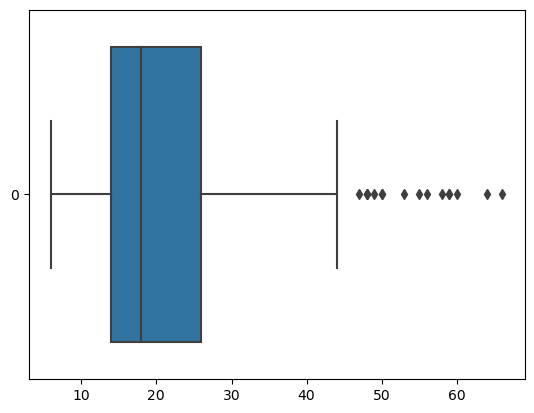

In [19]:
sns.boxplot(merged_df['dengue_search'], orient='h') 

In [20]:
numerical_features = [features for features in merged_df.columns if merged_df[features].dtype != 'O']

discrete_feature = [feature for feature in numerical_features if len(merged_df[feature].unique())<120]
print('Discrete Variables Count:{}'.format(len(discrete_feature)))

Discrete Variables Count:17


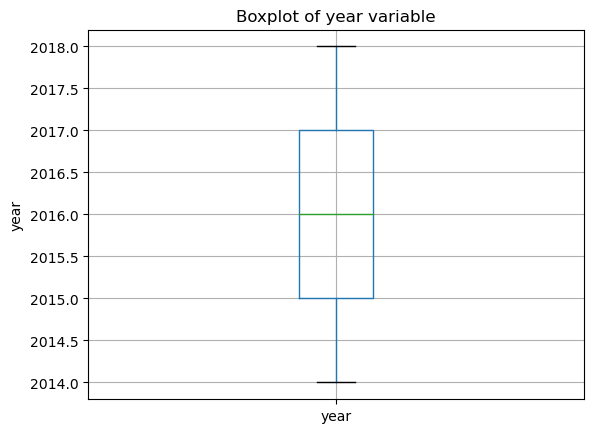

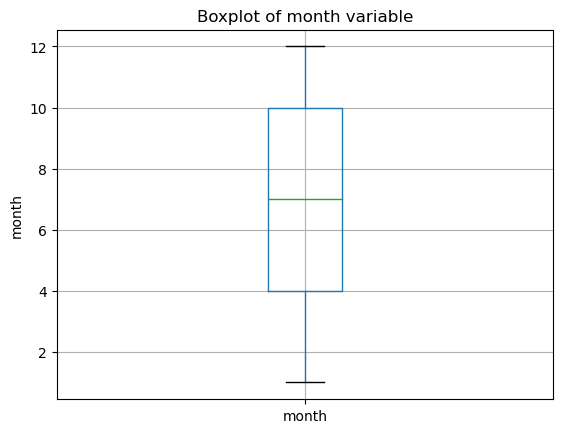

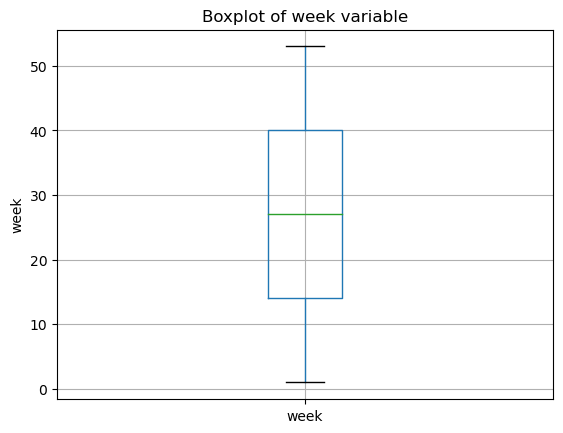

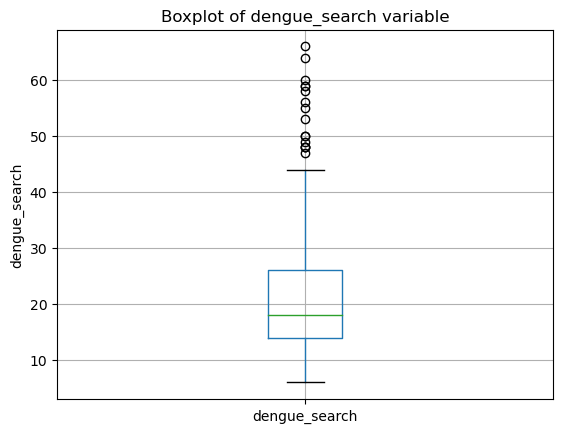

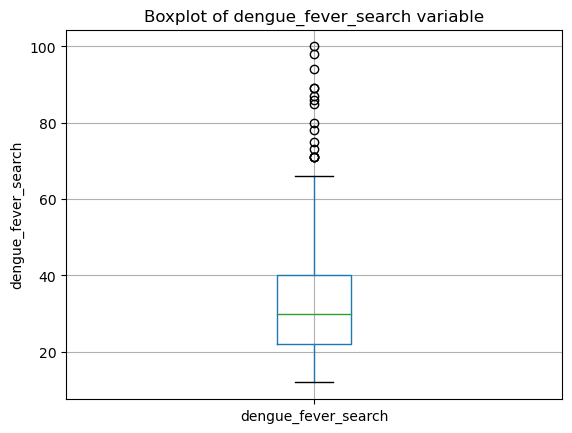

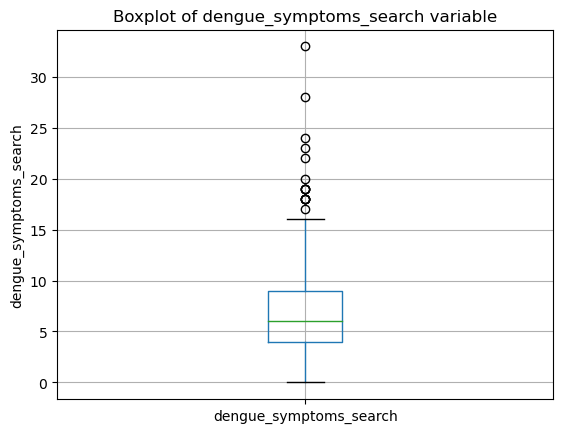

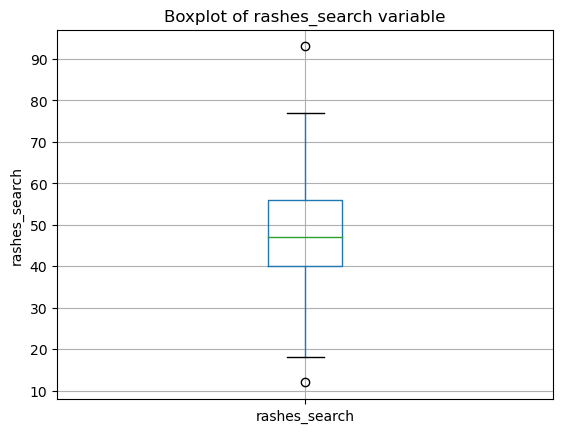

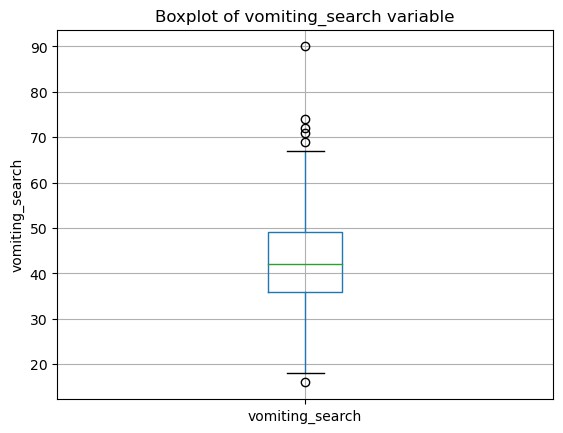

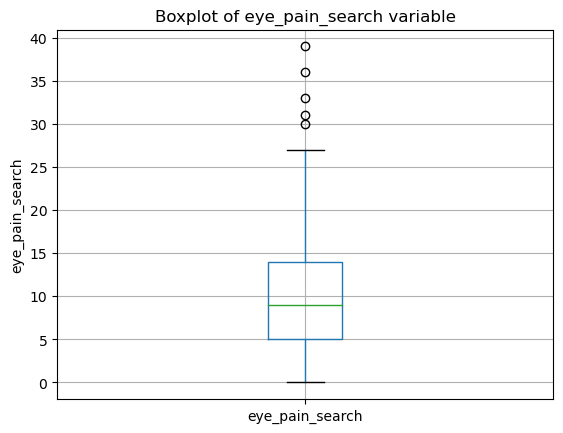

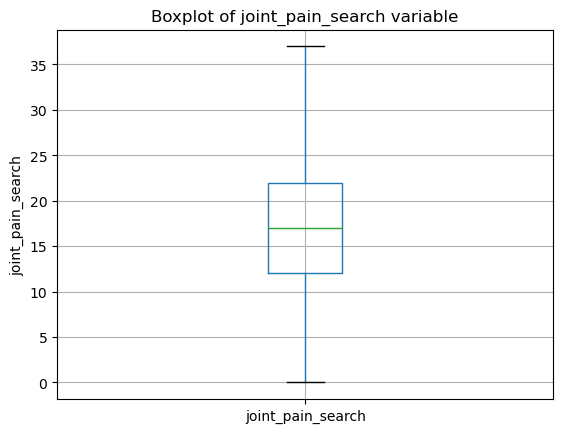

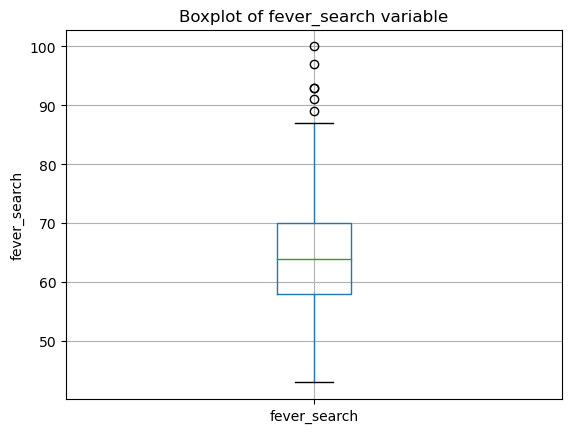

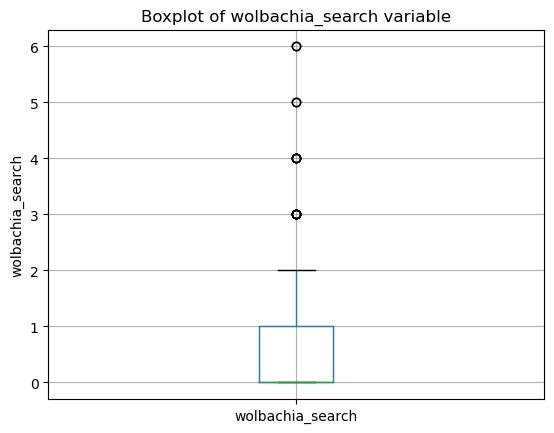

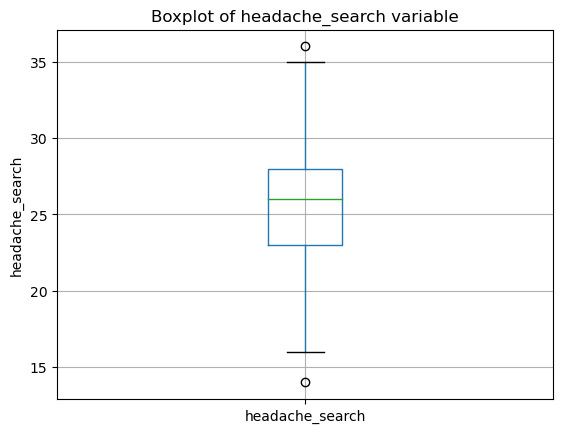

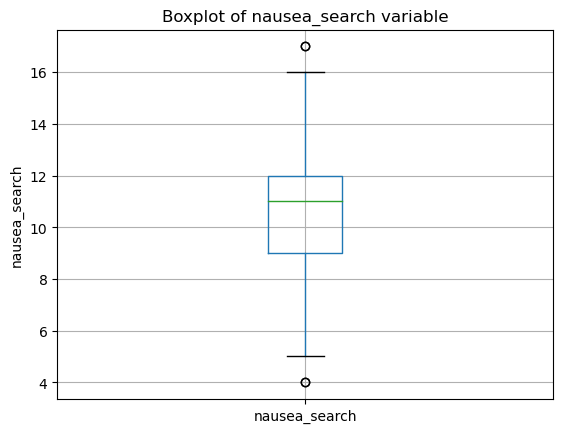

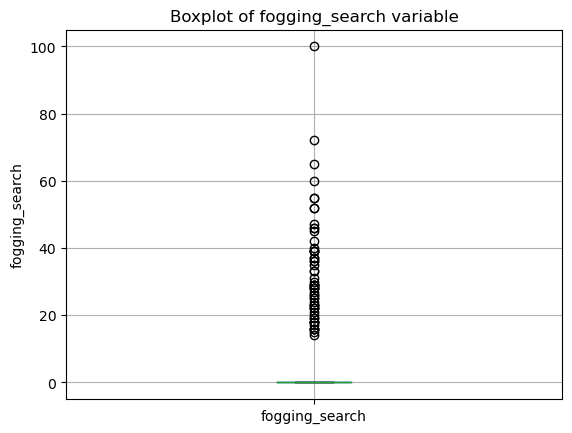

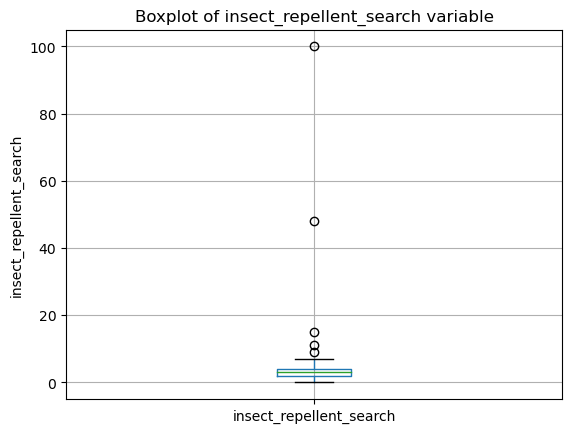

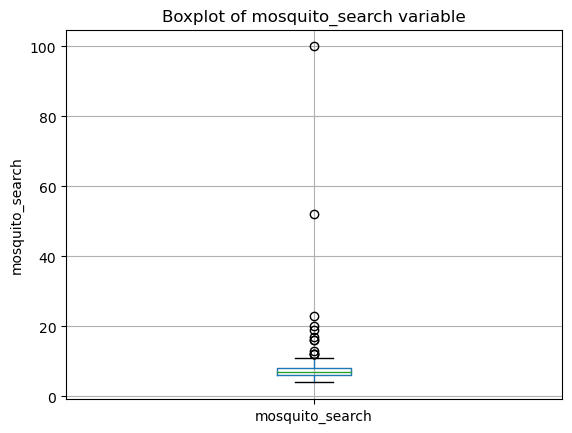

In [21]:
for feature in discrete_feature:
    data=merged_df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(f'Boxplot of {feature} variable')
    plt.show()

**Insights**:
1. All the search terms have outliers. This might be an indicator that the search patterns are spiked during certain periods.
2. We will be finding out the patterns of the search term in the following steps

year


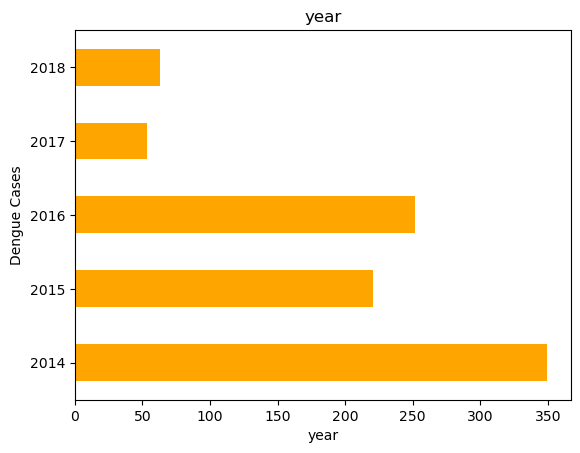

month


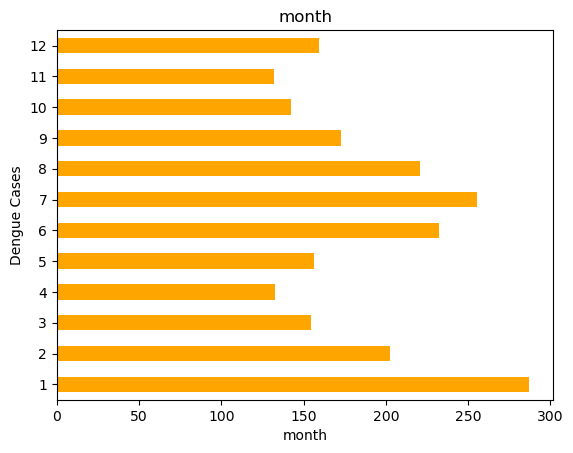

week


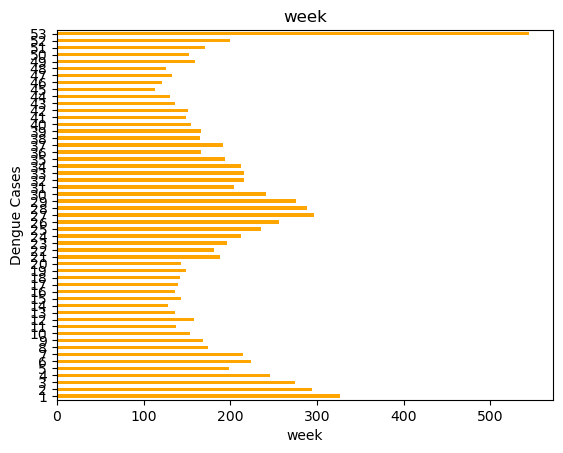

dengue_search


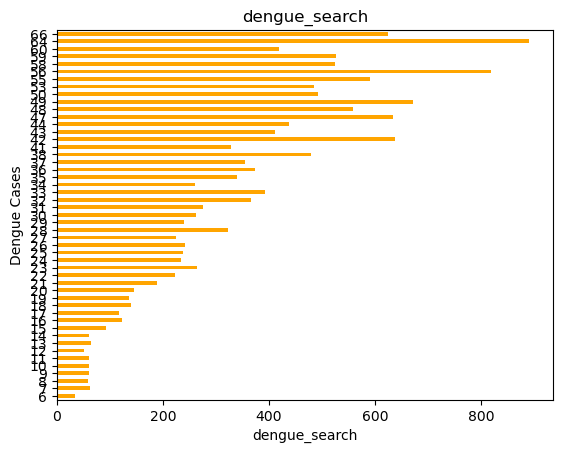

dengue_fever_search


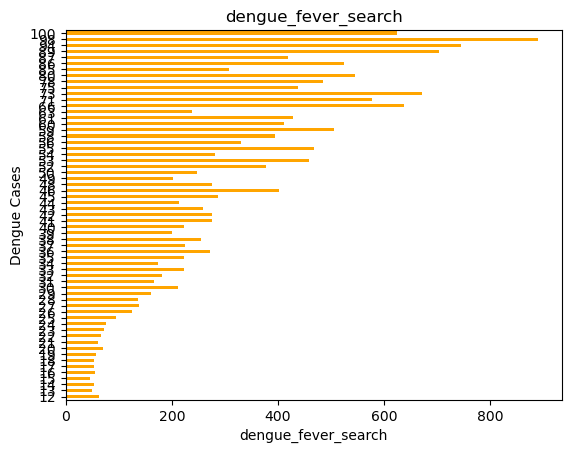

dengue_symptoms_search


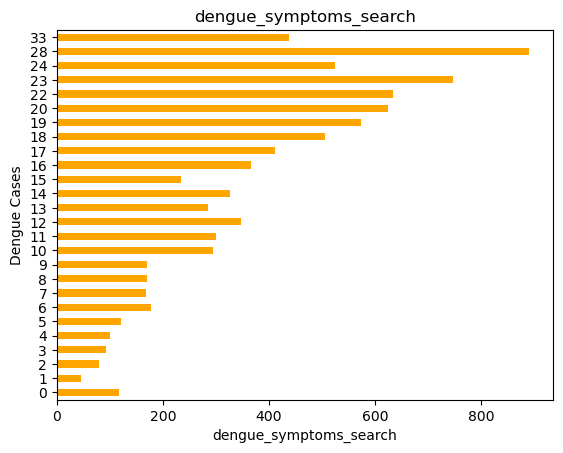

rashes_search


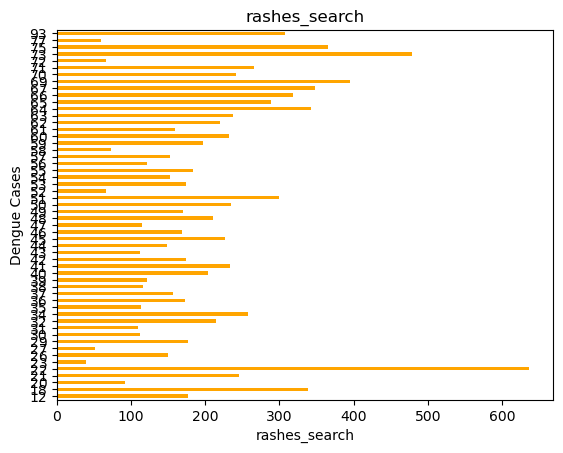

vomiting_search


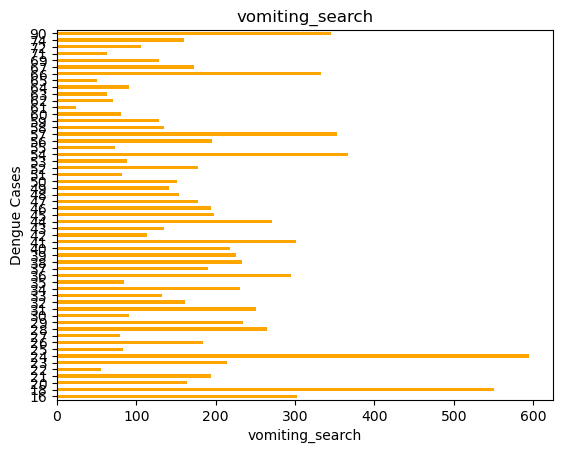

eye_pain_search


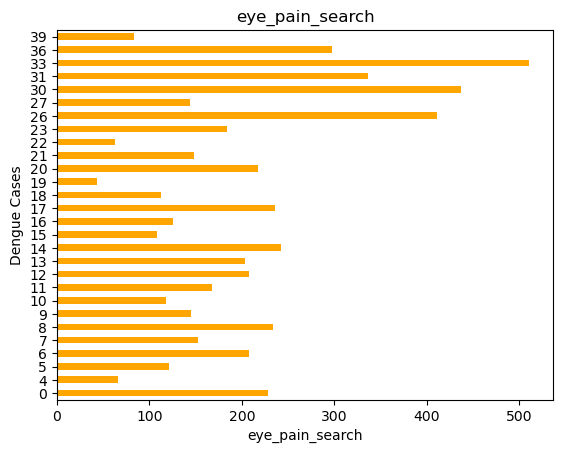

joint_pain_search


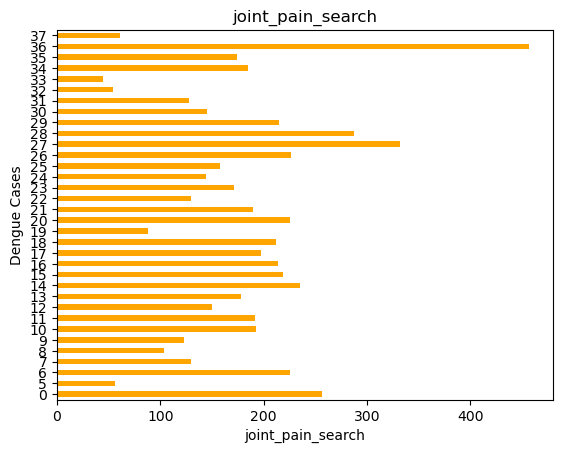

fever_search


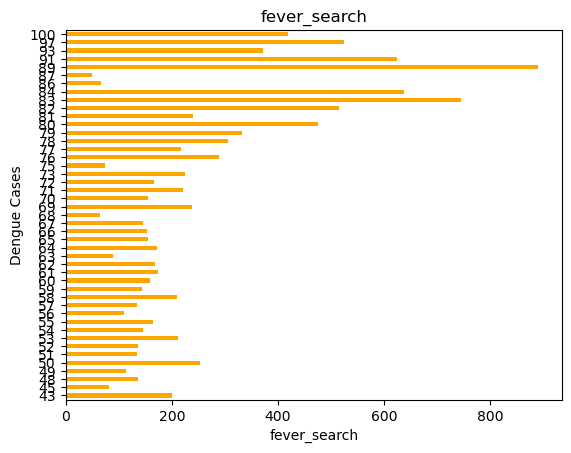

wolbachia_search


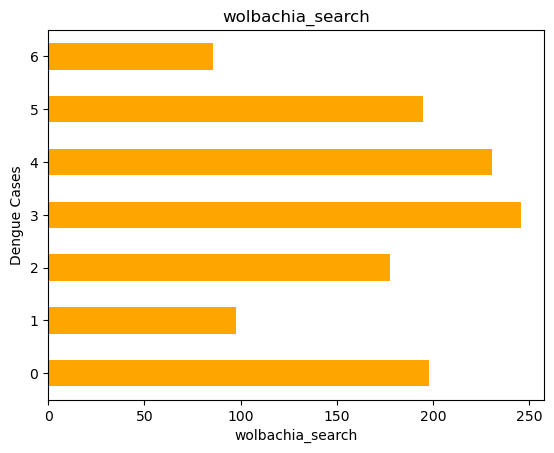

headache_search


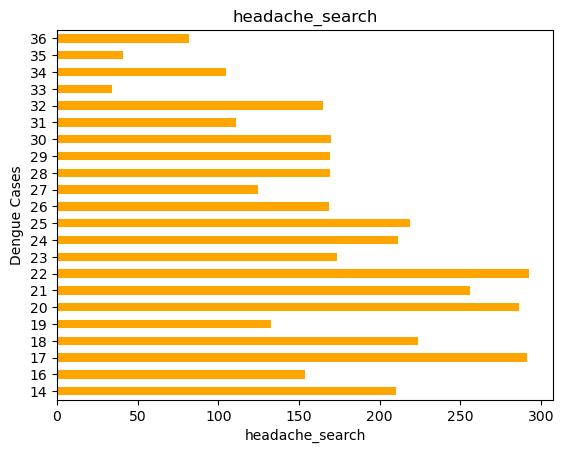

nausea_search


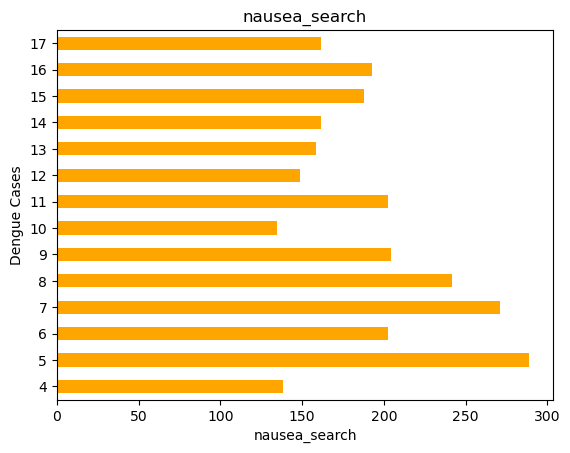

fogging_search


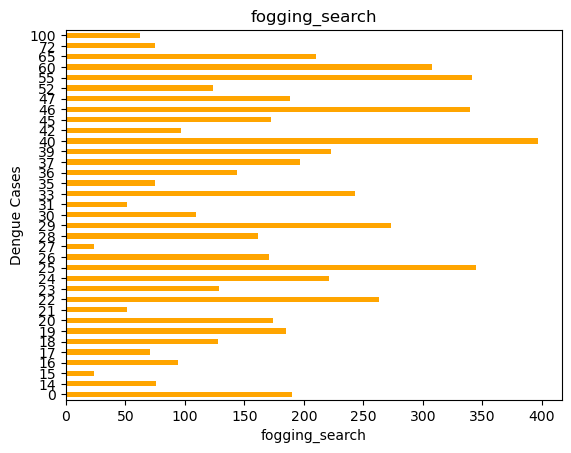

insect_repellent_search


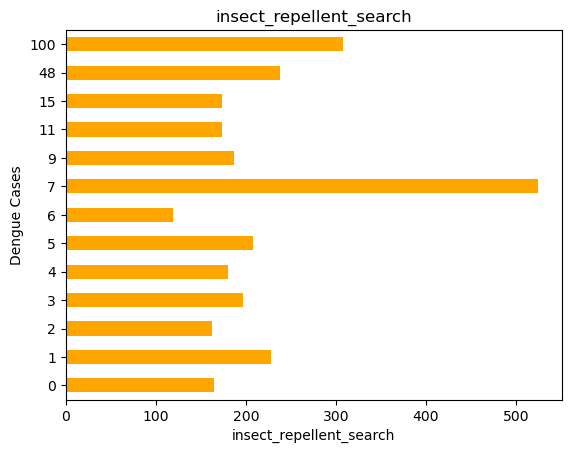

mosquito_search


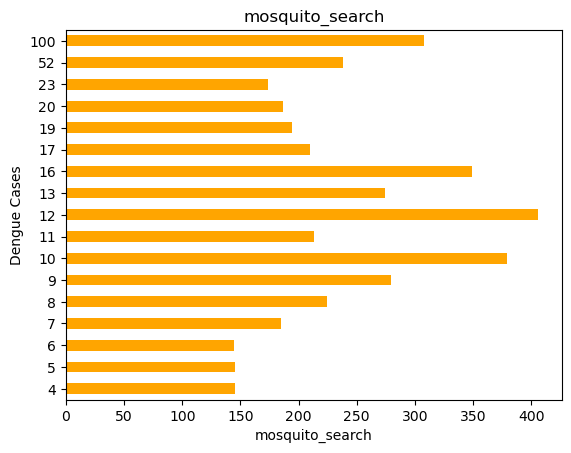

In [22]:
# find out the intensity of the search terms in an aggregate manner

for feature in discrete_feature:
    data = merged_df.copy()
    data.groupby(feature)['dengue_sum'].mean().plot.barh(color='orange')
    print (feature)
    plt.xlabel(feature)
    plt.ylabel('Dengue Cases')
    plt.title(feature)
    plt.show()

In [23]:
# group months into into monsoon seasons

def monsoon_status(merged_df):
    if merged_df['month'] == 12 or merged_df['month'] == 1 or merged_df['month'] == 2:
        return 'Northeast Monsoon (Dec-Feb)'
    elif merged_df['month'] == 6 or merged_df['month'] == 7 or merged_df['month'] == 8 or merged_df['month']== 9:
        return 'Southwest Monsoon (Jun-Sept)'
    elif merged_df['month'] == 10 or merged_df['month'] == 11:
        return 'Inter-monsoon (Oct - Nov)'
    else:
        return 'Inter-monsoon (Mar-May)'

merged_df['season'] = merged_df.apply(monsoon_status, axis = 1)

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_98801/219181551.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


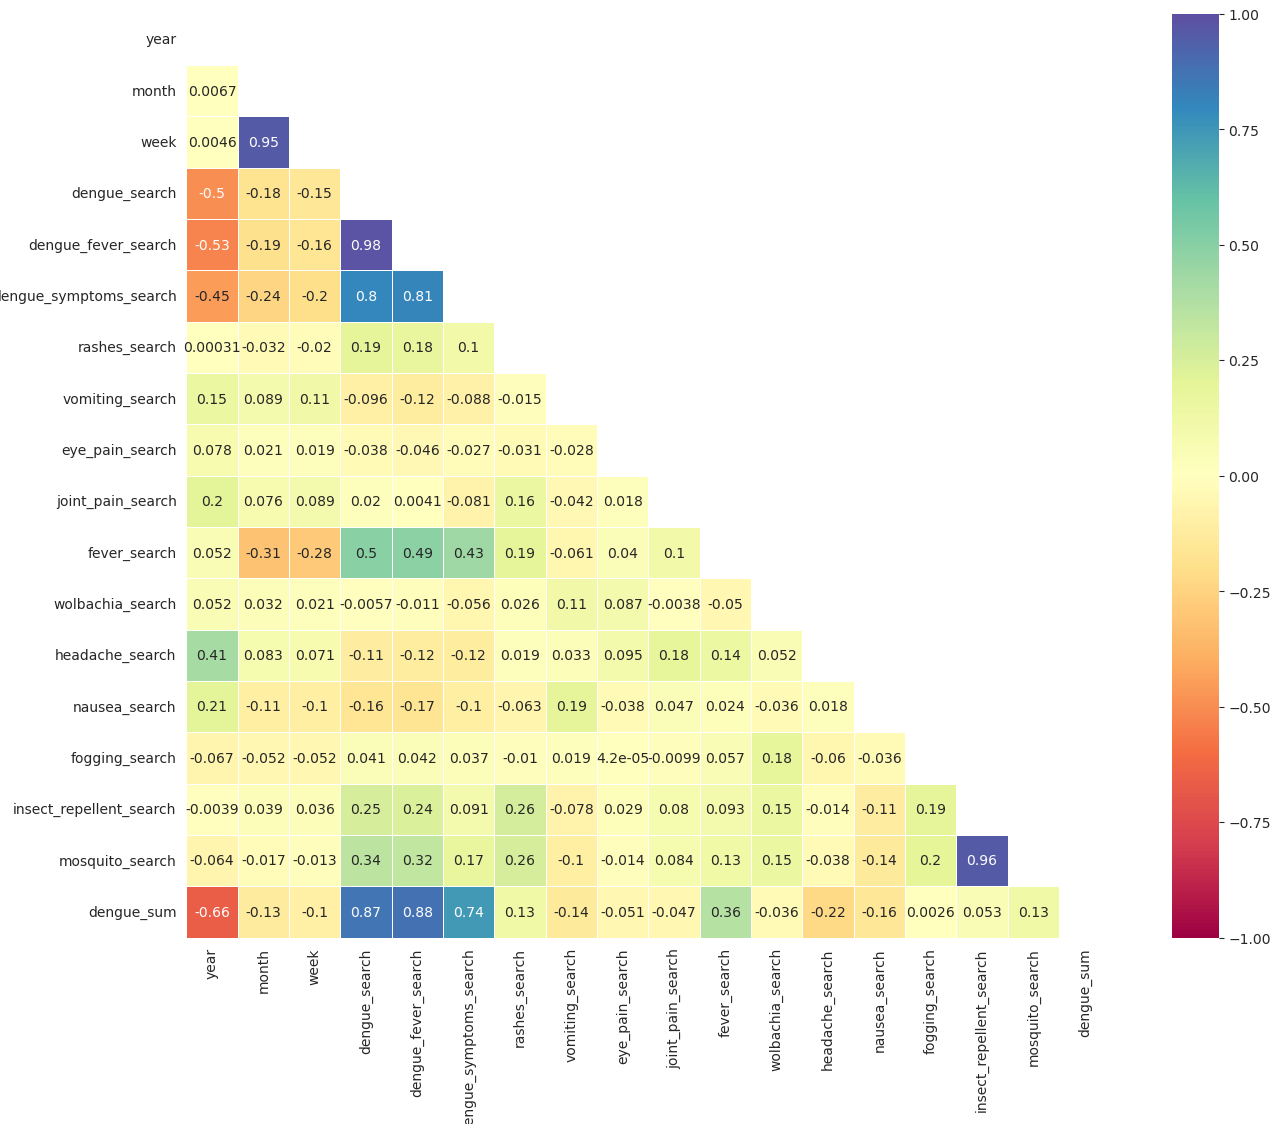

In [24]:
# Get correlation of the remaining features after cleaning
plt.figure(figsize = (16,12))

corr = merged_df.corr()

# Set up mask to be "True" in the upper triangle. this is to reduce the number of 'squares' seen in the correlation heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='Spectral')

**Observations :**
1. Dengue cases are correlated with the search terms 'dengue', 'dengue_fever', 'fever', and 'vomitting'
2. We can introduce interaction terms for these with strong correlation. 
    * 'Fever' has a strong corr with 'dengue', 'denger_fever' and 'dengue_symptoms'
    * 'Dengue_fever' and 'dengue_symptoms' have a strong correlation with 'dengue'
    * 'Vomitting' has a strong negative correlation with 'dengue_fever'
3. These strong correlations also aludes to the common symptoms of dengue
4. Interestingly, there is a weak correlations between 'fogging' and 'wolbacia' with 'dengue_sum'. In fact, it is negatively correlated. 
    * this might shed some light that awareness on fogging and wolbachia is lower when dengue cases are high.
    * we need to investigate further with more EDA below


In [25]:
# interaction term between 'fever' and 'dengue'
merged_df['fever_and_dengue'] = merged_df['fever_search'] * merged_df['dengue_search']

# interaction term between 'dengue_fever' and 'dengue'
merged_df['denguefever_and_dengue'] = merged_df['dengue_fever_search'] * merged_df['dengue_search']

# interaction term between 'repellent' and 'mosquito'
merged_df['mosquito_and_repellent'] = merged_df['mosquito_search'] * merged_df['insect_repellent_search']

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_98801/219181551.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


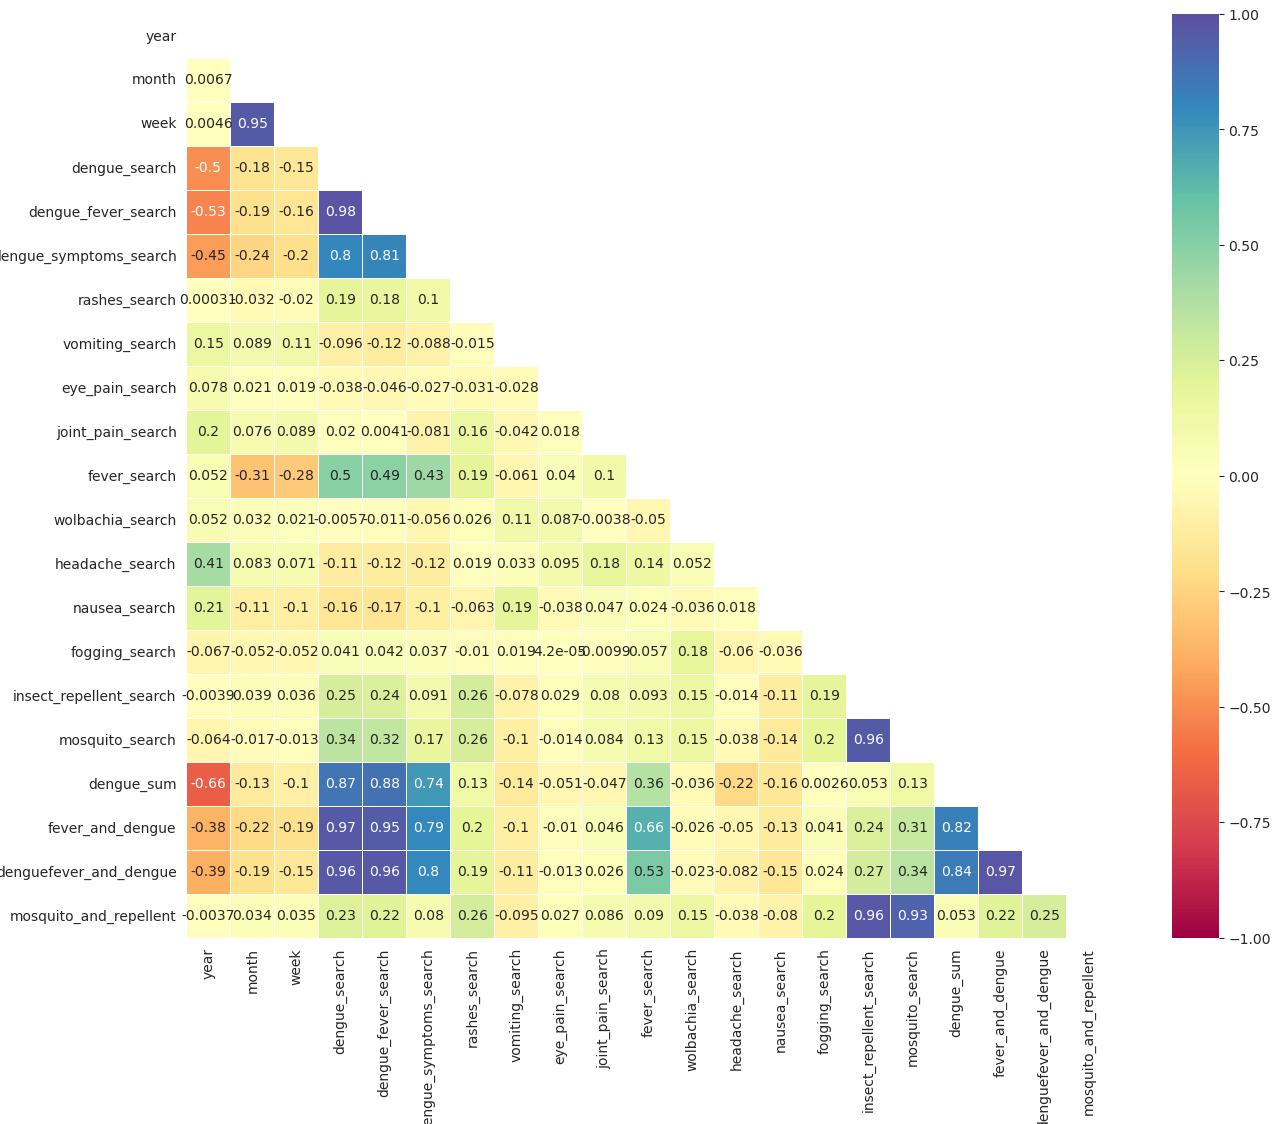

In [26]:
# Get correlation of the remaining features after cleaning
plt.figure(figsize = (16,12))

corr = merged_df.corr()

# Set up mask to be "True" in the upper triangle. this is to reduce the number of 'squares' seen in the correlation heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='Spectral')

**Recommendation**: use interaction terms for modelling instead of the individual terms as it absorbs the dependencies of highly correlated variables.

Next, we can group the search term by symptoms, and see how it moves with the number of cases

the common symptoms of dengue are: vomitting/nausea, rash, aches and pain (eye-pain), fever, joint-pain

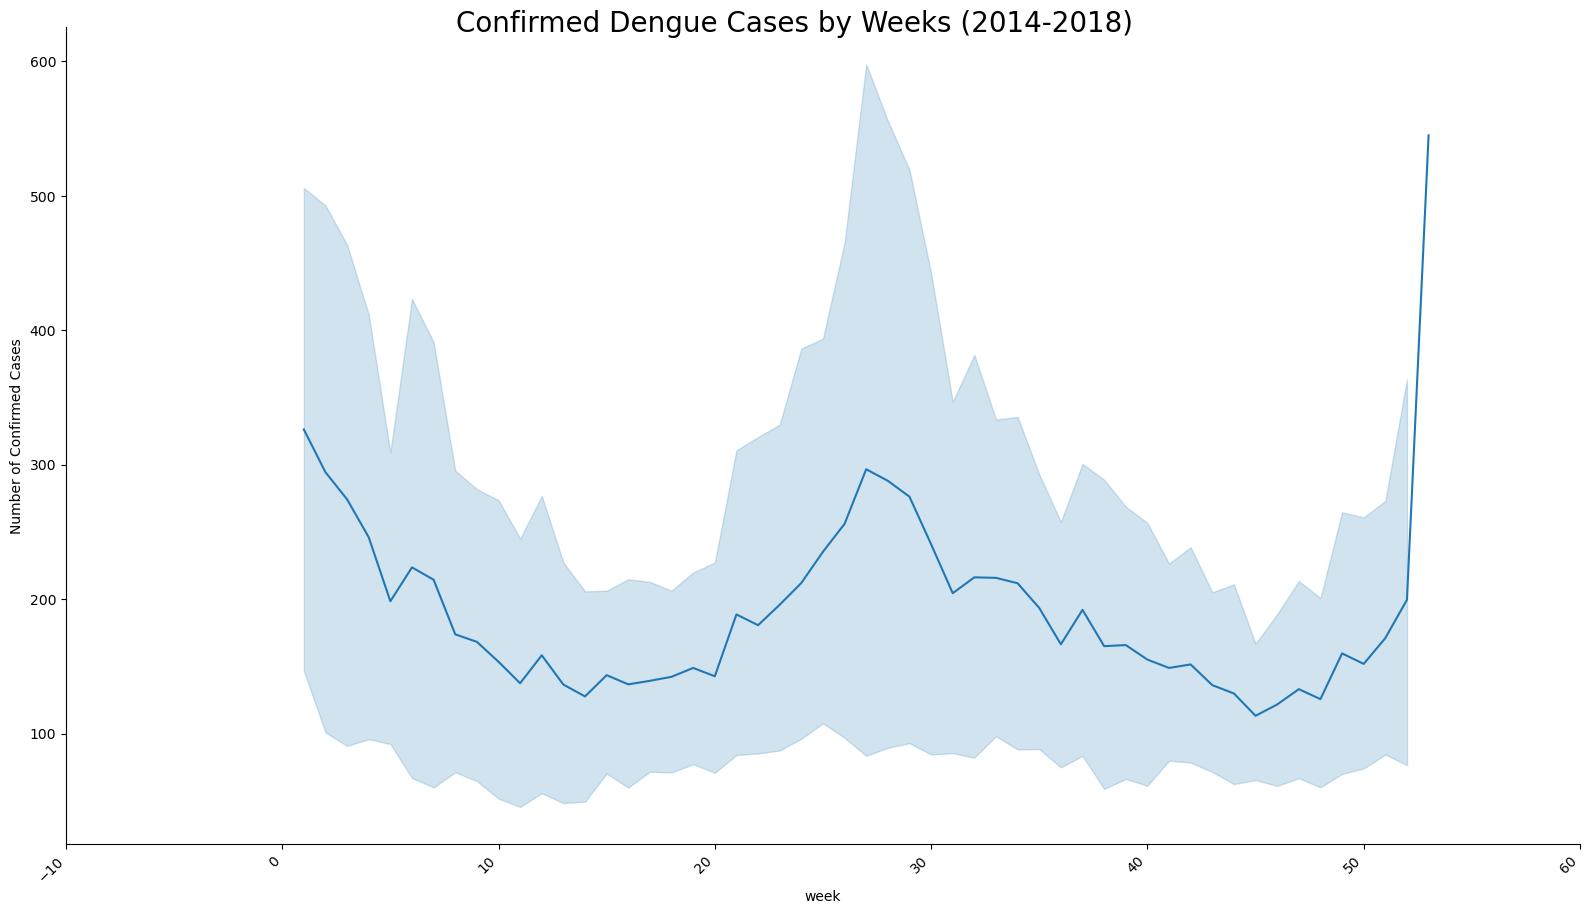

In [27]:
g = sns.relplot(x="week", y="dengue_sum",
            height=4, aspect=4, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=merged_df)
g.set_xticklabels(rotation=45,fontsize=10,horizontalalignment='right')
#g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Confirmed Dengue Cases by Weeks (2014-2018)', fontsize=20)
g.fig.set_figheight(10)
g.set_axis_labels(y_var="Number of Confirmed Cases")

In [28]:
date_groups = merged_df.groupby('month')['dengue_sum'].mean()

In [29]:
date_groups.nlargest()
# top 5 months with the most dengue cases across 2014-2018
# this gives us a clue on when we should start the awareness campaign

month
1    287.227273
7    255.434783
6    232.333333
8    220.636364
2    202.550000
Name: dengue_sum, dtype: float64

**My plans:**
1. find out cases vs google search trends on symptoms
2. find out cases vs fogging
3. find out cases vs wolbachia
4. control by months

In [30]:
# normalize the dengue cases number so it can be shown on the graph properly

value_to_normalize = merged_df['dengue_sum']

# Calculate the minimum and maximum values of the series
min_value = value_to_normalize.min()
max_value = value_to_normalize.max()

# Normalize the values in the series using the formula
merged_df['normalized_dengue_sum'] = ((value_to_normalize - min_value) / (max_value - min_value)) * 100

Text(0.5, 1.0, 'Dengue Cases and Search on Fever and Dengue keywords')

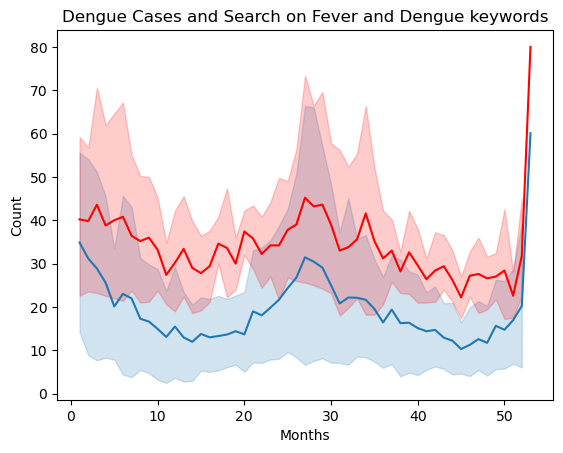

In [31]:
sns.lineplot(x='week', y='normalized_dengue_sum', data=merged_df)
sns.lineplot(x='week', y='dengue_fever_search', data=merged_df, color='red')

plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Dengue Cases and Search on Fever and Dengue keywords')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


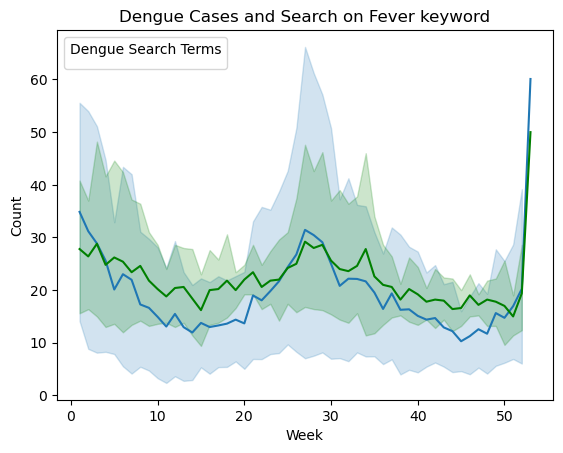

In [32]:
sns.lineplot(x='week', y='normalized_dengue_sum', data=merged_df)
sns.lineplot(x='week', y='dengue_search', data=merged_df, color='green')

plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Dengue Cases and Search on Fever keyword')
plt.legend(title="Dengue Search Terms", loc="upper left")

Text(0.5, 1.0, 'Dengue Cases and Search on Mosquito and Dengue Fever keywords')

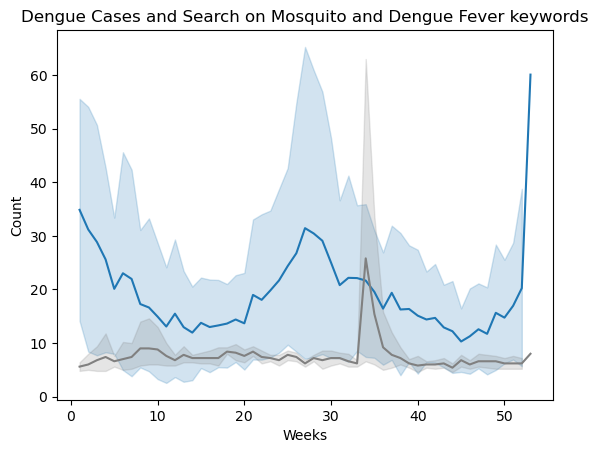

In [33]:
sns.lineplot(x='week', y='normalized_dengue_sum', data=merged_df)
sns.lineplot(x='week', y='mosquito_search', data=merged_df, color='grey')

plt.xlabel('Weeks')
plt.ylabel('Count')
plt.title('Dengue Cases and Search on Mosquito and Dengue Fever keywords')

Text(0.5, 1.0, 'Dengue Cases and Search on Mosquito and Insect Repellent keywords')

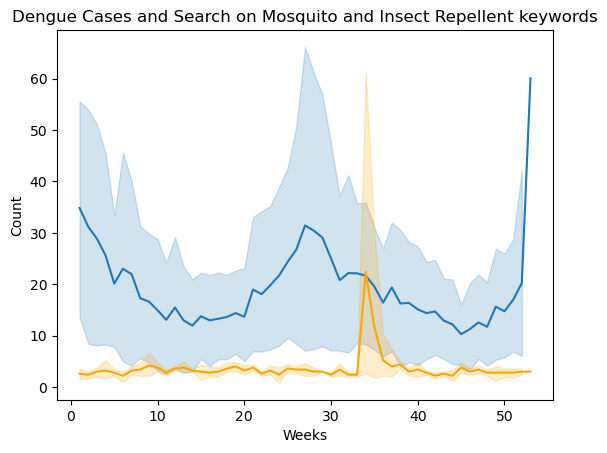

In [34]:
sns.lineplot(x='week', y='normalized_dengue_sum', data=merged_df)
sns.lineplot(x='week', y='insect_repellent_search', data=merged_df, color='orange')

plt.xlabel('Weeks')
plt.ylabel('Count')
plt.title('Dengue Cases and Search on Mosquito and Insect Repellent keywords')

**Insights**:
1. The spike in cases always coincides with the spike of search trends. 
2. This is especially clear for the dengue fever and fever related search
3. We will use this insight as an important feature for modelling